# Julia - Notes 1

In [28]:
println("hello nathy")

hello nathy


In [31]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*π*r^3
end

sphere_vol(6)

904.7786842338603

In [13]:
# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

quadratic(4,2,0)

0.25

In [26]:
# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("results: ", quad1, ", ", quad2)  # TODO pretty printing

results: 3.0, -2.0


# Multidimensional Arrays

In [36]:
m1 = hcat(repeat([1,2],inner=[1],outer=[3*2]),
          repeat([1,2,3],inner=[2],outer=[2]),
          repeat([1,2,3,4],inner=[3],outer=[1]))

12×3 Array{Int64,2}:
 1  1  1
 2  1  1
 1  2  1
 2  2  2
 1  3  2
 2  3  2
 1  1  3
 2  1  3
 1  2  3
 2  2  4
 1  3  4
 2  3  4

In [39]:
findmax(m1, dims=1)

([2 3 4], CartesianIndex{2}[CartesianIndex(2, 1) CartesianIndex(5, 2) CartesianIndex(10, 3)])

# Graphs

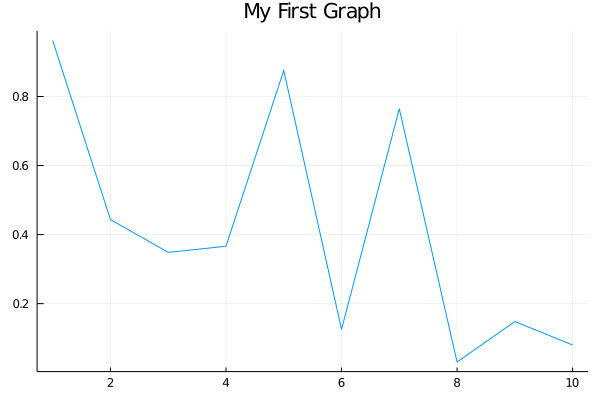

In [67]:
using Plots
x = 1:10; y = rand(10); # These are the plotting data
plot(x, y, title="My First Graph")

┌ Info: Saved animation to 
│   fn = /home/nathan/Documents/University/Year3/CompCogNeuro/tmp.gif
└ @ Plots /home/nathan/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/home/nathan/Documents/University/Year3/CompCogNeuro/tmp.gif")
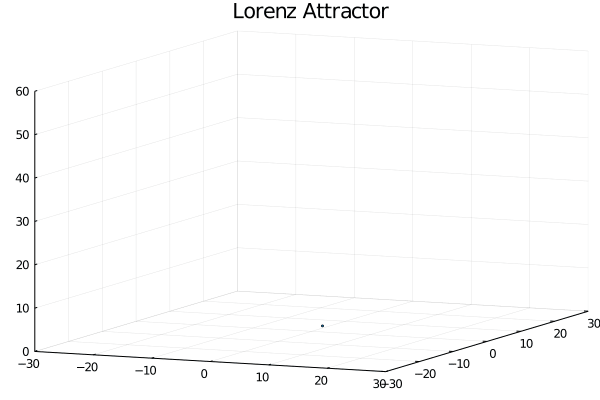

In [49]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:3000
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10


┌ Info: Saved animation to 
│   fn = /home/nathan/Documents/University/Year3/CompCogNeuro/tmp.gif
└ @ Plots /home/nathan/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/home/nathan/Documents/University/Year3/CompCogNeuro/tmp.gif")
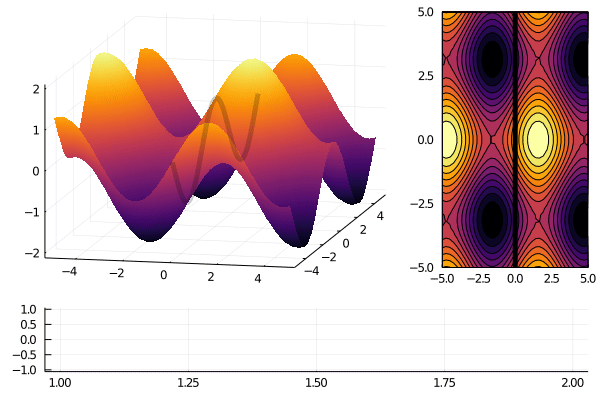

In [48]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

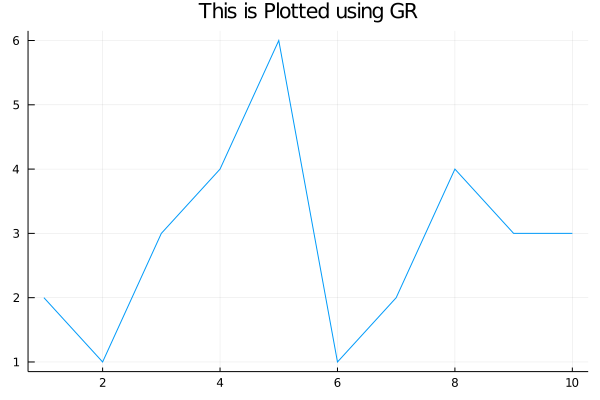

In [62]:
gr() # Set the backend to GR
# This plots using GR
plot(x, y, title = "This is Plotted using GR")

# Linear Algebra 

In [14]:
using LinearAlgebra

A = [1 2 3; 4 1 6; 7 8 1]

3×3 Array{Int64,2}:
 1  2  3
 4  1  6
 7  8  1

In [19]:
tr(A)  # `trace` :: sums the diagonal elements

3

In [21]:
det(A)

104.0

In [24]:
inv(A)

3×3 Array{Float64,2}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

In [27]:
eigvals(A)

3-element Array{Float64,1}:
 -6.214612641961068
 -1.5540265964847833
 10.768639238445843

In [29]:
eigvecs(A)

3×3 Array{Float64,2}:
 -0.175709  -0.766257  -0.344989
 -0.570057   0.587185  -0.589753
  0.802596   0.26089   -0.730188

In [32]:
# To solve linear equations
x = [1; 2; 3]  # semi-colons needed
A\x

3-element Array{Float64,1}:
 0.23076923076923075
 0.15384615384615385
 0.15384615384615385